In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../DATA/cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<Axes: >

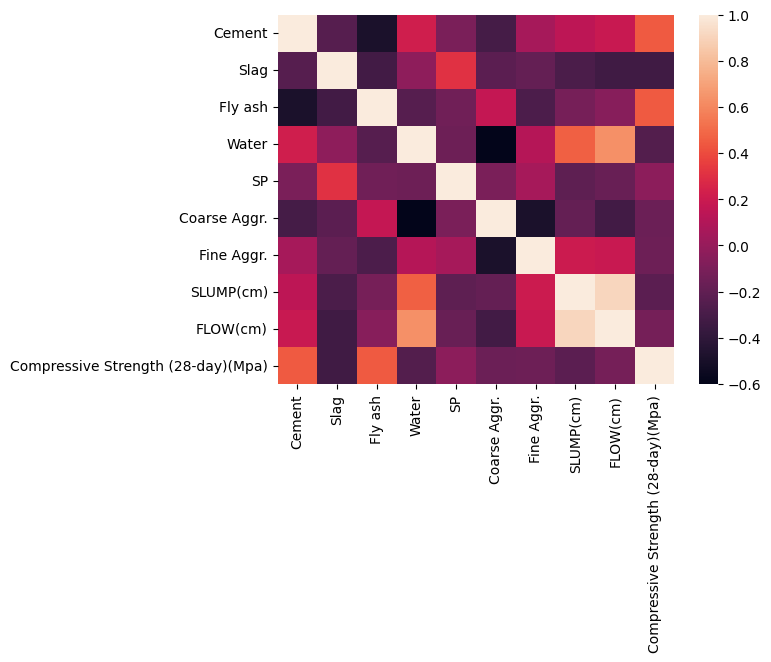

In [7]:
sns.heatmap(df.corr())

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
from sklearn.svm import SVR, LinearSVR

In [16]:
base_model = SVR()

In [18]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [19]:
base_preds = base_model.predict(scaled_X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
mean_absolute_error(y_test, base_preds)

5.236902091259178

In [22]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327133

In [23]:
y_test.mean()

36.26870967741935

GRID Search 

In [25]:
param_grid= {
    'C':[0.001,0.01,0.1,0.5,1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma':['scale','auto'],
    'degree':[2,3,4],
    'epsilon':[0,0.01,0.1,0.5,1,2]
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [26]:
svr = SVR()
grid = GridSearchCV(svr, param_grid=param_grid)

In [27]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [28]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [29]:
grid_preds = grid.predict(scaled_X_test)

In [30]:
mean_absolute_error(y_test,grid_preds)

2.512801221076176

In [31]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.178210305119839

In [32]:
grid_preds

array([20.39710091, 38.61832633, 32.55457617, 30.34401581, 46.35663548,
       38.53814843, 33.8672516 , 40.25885413, 37.92017232, 50.0907585 ,
       37.59938866, 31.19047761, 28.9592289 , 35.54472932, 44.64694045,
       46.73478893, 45.60228167, 36.35972701, 31.04354039, 34.3730726 ,
       42.39652393, 39.14709188, 33.71510905, 31.99037892, 49.84740118,
       39.07284116, 30.38381941, 28.99204115, 39.08726461, 32.20584581,
       31.98145726])